In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf



In [2]:
path = r'C:\Users\91937\Downloads\dataset\dataset\Indian-Traffic Sign-Dataset\Images' # folder with all the class folders
labelFile = r'C:\Users\91937\Downloads\dataset\dataset\Indian-Traffic Sign-Dataset\traffic_sign.csv'
batch_size_val=50  # how many to process together
steps_per_epoch_val=502
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.1   # if 1000 images split will 100 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation

In [3]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)


Total Classes Detected: 58
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

#X_train = ARRAY OF IMAGES TO TRAIN
#y_train = CORRESPONDING CLASS ID

In [5]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

Data Shapes
Train(10058, 32, 32, 3) (10058,)
Validation(2515, 32, 32, 3) (2515,)
Test(1398, 32, 32, 3) (1398,)
data shape  (58, 2) <class 'pandas.core.frame.DataFrame'>


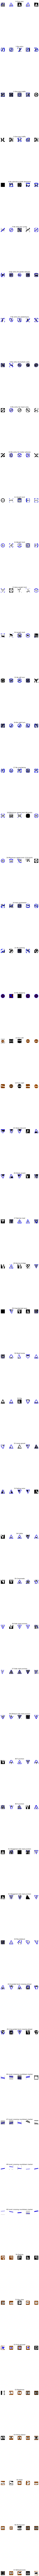

In [6]:
import random 
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[141, 140, 143, 144, 156, 228, 137, 138, 420, 149, 139, 145, 134, 152, 143, 142, 145, 134, 150, 154, 425, 143, 150, 148, 142, 158, 152, 143, 140, 142, 156, 145, 144, 143, 144, 135, 156, 150, 151, 144, 135, 150, 139, 149, 131, 141, 105, 130, 46, 148, 423, 146, 442, 438, 454, 151, 145, 140]
Number of classes: 58
Length of range(0, num_classes): 58
Length of num_of_samples: 58


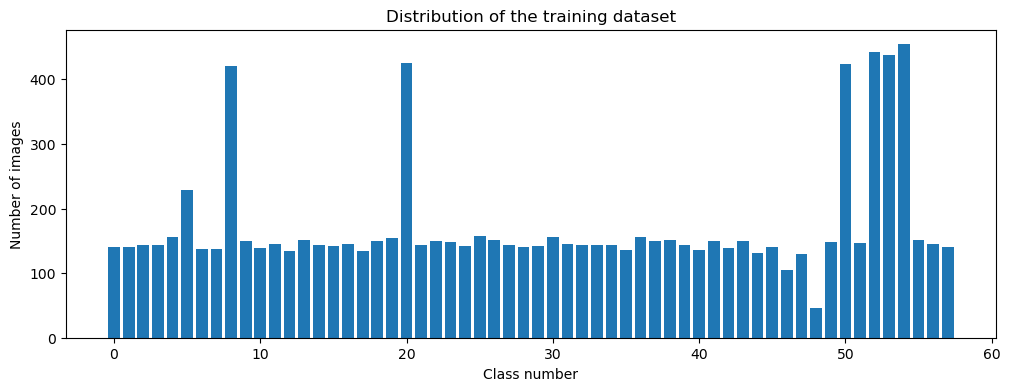

In [39]:
print(num_of_samples)  # Print out num_of_samples for inspection
plt.figure(figsize=(12, 4))

# Check if num_classes is correctly calculated
print("Number of classes:", num_classes)

# Check the lengths of range(0, num_classes) and num_of_samples for potential issues
print("Length of range(0, num_classes):", len(range(0, num_classes)))
print("Length of num_of_samples:", len(num_of_samples))

plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


In [40]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img
 

In [41]:
X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [42]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED

X_batch,y_batch = next(batches)

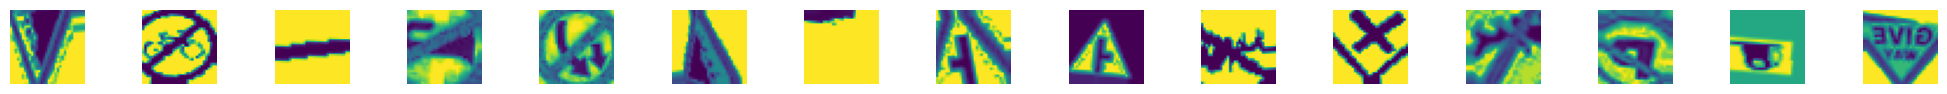

In [43]:
# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)


In [46]:
def newModel(num_classes):
    no_Of_Filters = 60
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_Of_Nodes = 500
    newModel = Sequential()
    newModel.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1),
                     activation='relu'))
    newModel.add(Conv2D(no_Of_Filters, size_of_Filter, activation='relu'))
    newModel.add(MaxPooling2D(pool_size=size_of_pool))
    newModel.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    newModel.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    newModel.add(MaxPooling2D(pool_size=size_of_pool))
    newModel.add(Dropout(0.5))
    newModel.add(Flatten())
    newModel.add(Dense(no_Of_Nodes, activation='relu'))
    newModel.add(Dropout(0.5))
    newModel.add(Dense(num_classes, activation='softmax'))  # Modified this line
    newModel.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return newModel

# Ensure that num_classes matches the actual number of classes in your dataset
num_classes = 58  # Change this to the actual number of classes in your dataset
newModel = newModel(num_classes=num_classes)

history = newModel.fit(
    X_train, y_train,
    batch_size=batch_size_val,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=1
)



Epoch 1/10
202/202 [==============================] - 35s 171ms/step - loss: 3.2714 - accuracy: 0.1935 - val_loss: 2.2072 - val_accuracy: 0.4171
Epoch 2/10
202/202 [==============================] - 35s 173ms/step - loss: 2.0908 - accuracy: 0.4249 - val_loss: 1.4146 - val_accuracy: 0.6402
Epoch 3/10
202/202 [==============================] - 35s 173ms/step - loss: 1.5914 - accuracy: 0.5473 - val_loss: 1.0971 - val_accuracy: 0.6990
Epoch 4/10
202/202 [==============================] - 34s 171ms/step - loss: 1.3413 - accuracy: 0.6047 - val_loss: 0.9803 - val_accuracy: 0.7368
Epoch 5/10
202/202 [==============================] - 36s 177ms/step - loss: 1.1358 - accuracy: 0.6580 - val_loss: 0.9566 - val_accuracy: 0.7165
Epoch 6/10
202/202 [==============================] - 36s 178ms/step - loss: 1.0295 - accuracy: 0.6911 - val_loss: 0.8355 - val_accuracy: 0.7583
Epoch 7/10
202/202 [==============================] - 37s 183ms/step - loss: 0.9518 - accuracy: 0.7090 - val_loss: 0.7705 - val_ac

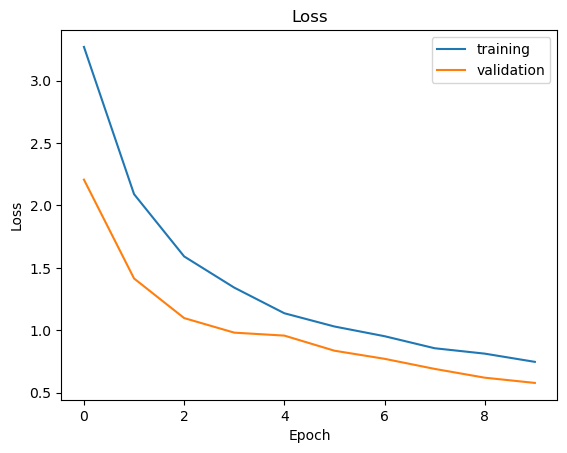

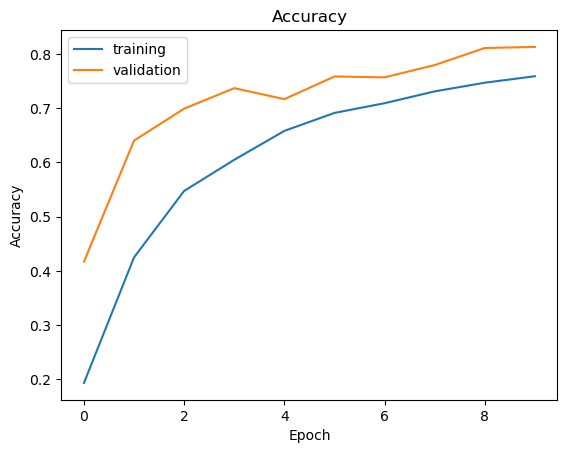

Test Score: 0.5487815737724304
Test Accuracy: 0.8233190178871155


INFO:tensorflow:Assets written to: Traffic_Model\assets


INFO:tensorflow:Assets written to: Traffic_Model\assets


In [48]:

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

score = newModel.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

newModel.save("Traffic_Model")
newModel.save_weights("results.h5")
